# Capstone Project - Churn Prediction

## 1) Problem Definition

Develop model to predict if customer is churn (Leaving the service / terminating thier telco contract)

Identify features which drive customer churn

## 2) Data Collection

The data set is collect from kaggle

Source: (https://www.kaggle.com/blastchar/telco-customer-churn)

File name: Telco-Customer-Churn.csv

**Context**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content** 

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration


In [192]:
# Import package

# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
 
    
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import xgboost as xgb

from keras.models import Sequential, load_model
from keras import layers
from keras.layers.core import Dropout
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Avoid some version change warning
import warnings
warnings.filterwarnings("ignore")


### Load Data

In [35]:
# Import data

df = pd.read_csv('DataSet/Potential/Telco-Customer-Churn.csv')

## 3) Exploratory Data Analysis 

In [36]:
# Display data in pandas 

df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [37]:
# Check dataset shape (number of row & columns)

df.shape

(7043, 21)

In [38]:
# List dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [39]:
# List all columns

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [40]:
# Check for null value

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [41]:
# Counting the number of missing values.

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [42]:
# Check for Domains & Intervals

print('- Domains, Intervals\n')
for c in df.columns:
    x = df[c].unique()
    x.sort()
    print('+ %-27s: (%-s)' % (c, df[c].dtypes.name))

    if df[c].dtypes.name != 'object':
        print('  min: %d, max: %d' % (df[c].min(), df[c].max()))
    print('  values: %s\n' % x)

- Domains, Intervals

+ customerID                 : (object)
  values: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

+ gender                     : (object)
  values: ['Female' 'Male']

+ SeniorCitizen              : (int64)
  min: 0, max: 1
  values: [0 1]

+ Partner                    : (object)
  values: ['No' 'Yes']

+ Dependents                 : (object)
  values: ['No' 'Yes']

+ tenure                     : (int64)
  min: 0, max: 72
  values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]

+ PhoneService               : (object)
  values: ['No' 'Yes']

+ MultipleLines              : (object)
  values: ['No' 'No phone service' 'Yes']

+ InternetService            : (object)
  values: ['DSL' 'Fiber optic' 'No']

+ OnlineSecurity             : (object)
  values: ['No'

In [48]:
# Check unique value in each features 

def print_unique_value(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f'{column}: {df[column].unique()}')

print_unique_value(df)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [49]:
# Check for continuous features statistic

df.describe().T

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [50]:
# Check churn values

df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Data Cleaning

In [51]:
# Drop the rows with missing values.

df = df.dropna()

### Data Preprocessing

In [52]:
# Consolidating wording with same meaning

df.replace('No phone service', 'No', inplace=True)
df.replace('No internet service', 'No', inplace=True)

In [53]:
# Change data type from object to float

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [54]:
# Re inspect the data type

df['TotalCharges'].dtypes

dtype('float64')

In [55]:
# Rename "PaymentMethod" column to presentable format

Payment_Method = {'Electronic check': 'E-Check' , 
                  'Mailed check': 'Mailed Check', 
                  'Bank transfer (automatic)': 'Bank Transfer', 
                  'Credit card (automatic)': 'Credit Card'}

df["PaymentMethod"].replace(Payment_Method, inplace=True)

### Data Exploration

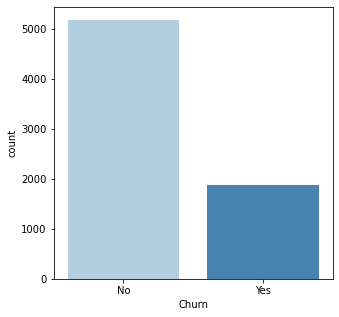

In [56]:
# Display a frequency distribution for churn. 

plt.figure(figsize=(5, 5))
ax = sns.countplot(x=df['Churn'], palette="Blues", linewidth=1)
plt.show()

In [57]:
# Create a function to generate boxplots.

plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}

def boxplot(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=df[[x, j]], palette="Blues", linewidth=1)
        ax.set_title(j)
        
    return plt.show()

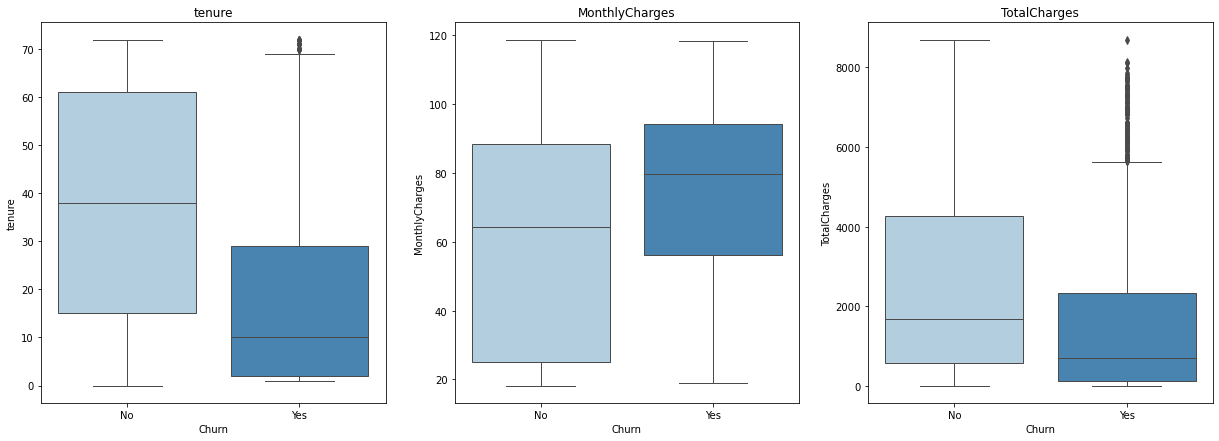

In [58]:
# Generate boxplots for tenure, MonthlyCharges and TotalCharges.

boxplot("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], df)

In [59]:
fig = px.scatter(x=df['tenure'], y=df['MonthlyCharges'], 
                 color = df['Churn'], template = 'presentation', 
                 opacity = 0.5, facet_col = df['Contract'], 
                 title = 'Customer Churn by Tenure, Charges, and Contract Type',
                 labels = {'x' : 'Customer Tenure', 'y' : 'MonthlyCharges $'})
                
fig.show()

In [60]:
fig = px.scatter(x=df['tenure'], y=df['TotalCharges'], 
                 color = df['Churn'], template = 'presentation', 
                 opacity = 0.5, facet_col = df['Contract'], 
                 title = 'Customer Churn by Tenure, Charges, and Contract Type',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Total Charges $'})
                
fig.show()

In [61]:
# Create a function to generate countplots:

def countplot(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)
        
    return plt.show()

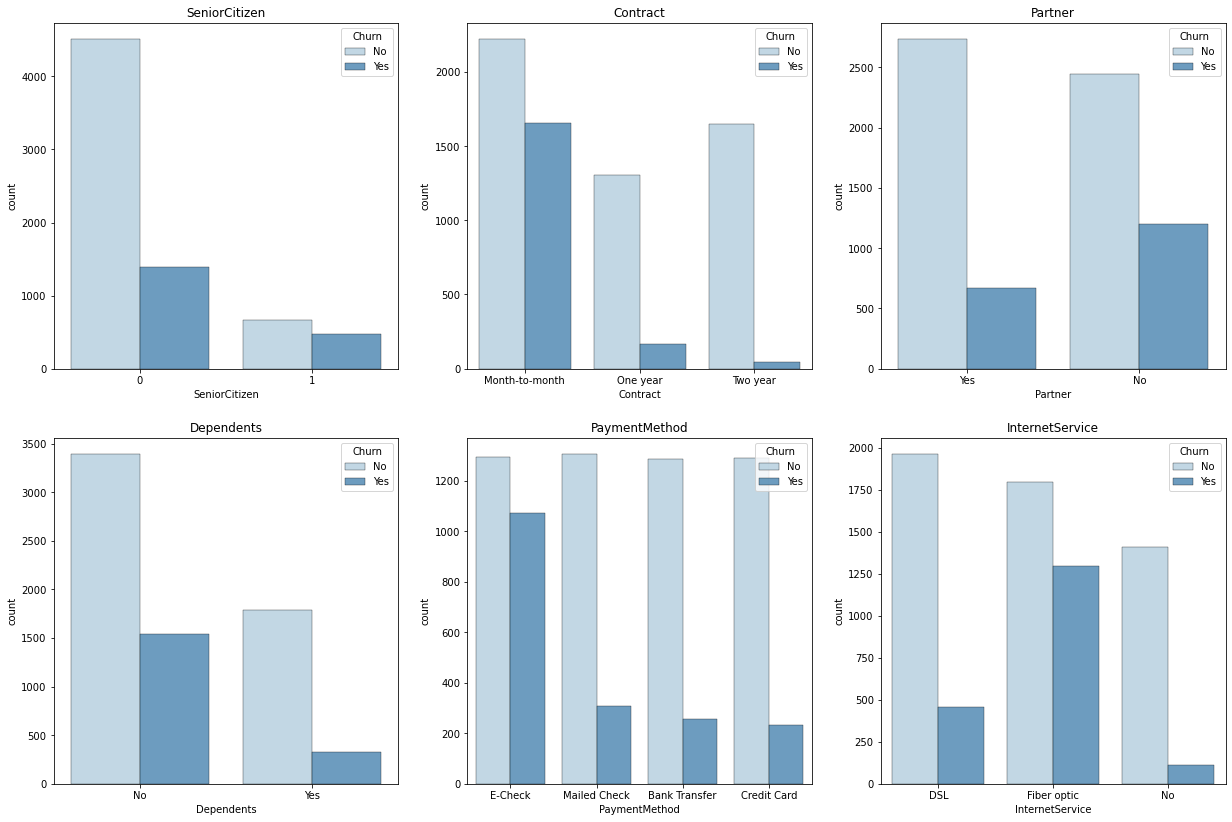

In [62]:
# Generate countplots for various features.

countplot("Churn", ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'], df)

In [63]:
# Check of outliers in numerical features by applying the IQR method checking if values are way outside the IQR borders.

numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df_num = df[numerical_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

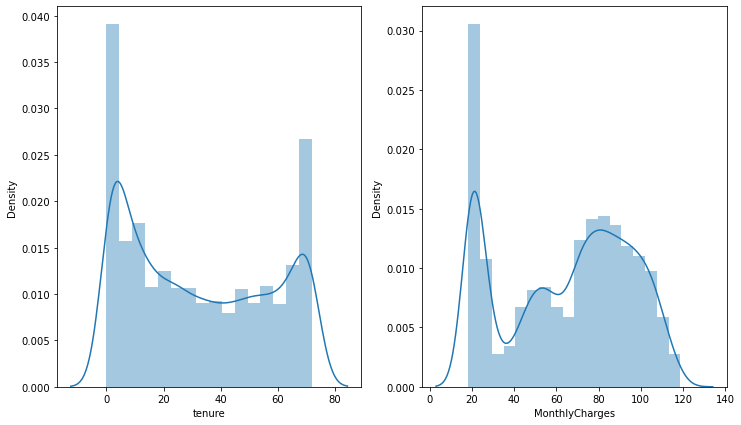

In [64]:
# Features Visualisation for continous data

fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(df["tenure"], ax=axes[0])
sns.distplot(df["MonthlyCharges"], ax=axes[1])

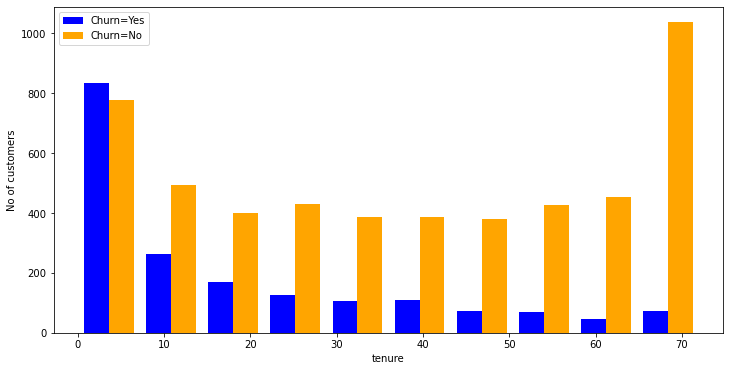

In [65]:
# Features Visualisation for "tenure" with "Churn" count

tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure
fig = plt.figure(figsize=(12,6))
plt.xlabel('tenure')
plt.ylabel('No of customers')
plt.hist([tenure_churn_yes, tenure_churn_no], color=['blue','orange'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

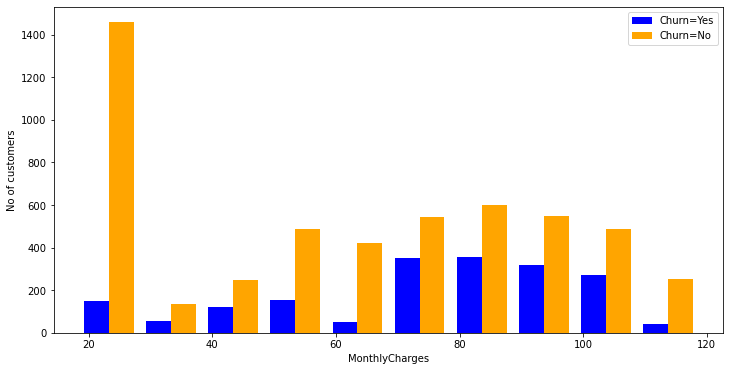

In [66]:
# Features Visualisation for "MonthlyCharges" with "Churn" count

monthly_charges_churn_no = df[df.Churn == 'No'].MonthlyCharges
monthly_charges_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges
fig = plt.figure(figsize=(12,6))
plt.xlabel('MonthlyCharges')
plt.ylabel('No of customers')
plt.hist([monthly_charges_churn_yes, monthly_charges_churn_no], color=['blue','orange'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

## 4) Featuring Engineering

In [67]:
# Remove customer ID from data frame

df = df.drop(columns=['customerID'])

In [68]:
# Generate new feature "Number_AdditionalServices" by summing up the number of add-on services consumed.

df_aos = df
df_aos['Add_On_Services'] = (df_aos[['OnlineSecurity', 
                                       'DeviceProtection', 
                                       'StreamingMovies', 
                                       'TechSupport', 
                                       'StreamingTV',
                                       'OnlineBackup']] =='Yes').sum(axis=1)

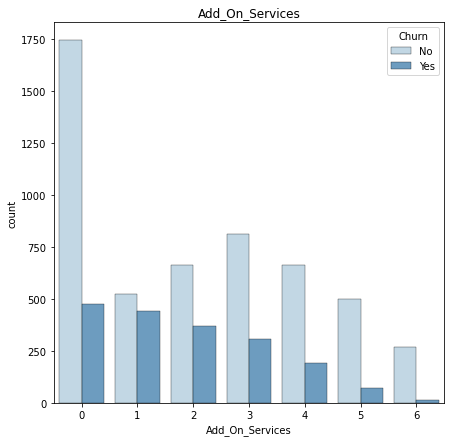

In [69]:
# Generate countplot for the new feature.

countplot('Churn', ['Add_On_Services'], df_aos)

In [70]:
# Check columns with two classes

columns = df.columns
binary_columns = []

for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_columns.append(col)
        
 
print('Number of columns with 2 class =',len(binary_columns))
binary_columns

Number of columns with 2 class = 14


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [71]:
# Check columns with multiple classes

columns = df.columns
multiple_class_columns = []

for col in columns:
    if df[col].value_counts().shape[0] != 2:
        multiple_class_columns.append(col)
        
 
print('Number of columns with multiple classes =',len(multiple_class_columns))
multiple_class_columns

Number of columns with multiple classes = 7


['tenure',
 'InternetService',
 'Contract',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Add_On_Services']

### Label Encoding

In [72]:
# Convert Yes & No to 1 & 0

for column in binary_columns:
    df[column].replace({'Yes':1, 'No':0}, inplace=True)

In [73]:
# Label Male & Female to 1 & 0

df.gender.replace({'Male':1, 'Female':0}, inplace=True)

In [74]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Add_On_Services'],
      dtype='object')

In [75]:
df.shape

(7043, 21)

### One Hot Encoding

In [76]:
# Creating dummy columns for features with multiple classes and non continuos datapoint

df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [77]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Add_On_Services', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank Transfer',
       'PaymentMethod_Credit Card', 'PaymentMethod_E-Check',
       'PaymentMethod_Mailed Check'],
      dtype='object')

In [78]:
# Rename column to presentable format

df = df.rename({'gender': 'Gender',
                'tenure': 'Tenure',
                'InternetService_DSL': 'IntService_DSL', 
                'InternetService_Fiber optic': 'IntService_Fiber', 
                'InternetService_No': 'IntService_No',
                'Contract_Month-to-month': 'Contract_Mth', 
                'Contract_One year': 'Contract_1Y', 
                'Contract_Two year': 'Contract_2Y',
                'PaymentMethod_Bank Transfer': 'PayMethod_Bank', 
                'PaymentMethod_Credit Card': 'PayMethod_C_Card', 
                'PaymentMethod_E-Check': 'PayMethod_Electonic', 
                'PaymentMethod_Mailed Check': 'PayMethod_Mail'}, axis=1)

In [79]:
# Relocate "Churn" column to last row

df= df[ [ col for col in df.columns if col != 'Churn' ] + ['Churn']]

In [80]:
# Re-inspect dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               7043 non-null   int64  
 1   SeniorCitizen        7043 non-null   int64  
 2   Partner              7043 non-null   int64  
 3   Dependents           7043 non-null   int64  
 4   Tenure               7043 non-null   int64  
 5   PhoneService         7043 non-null   int64  
 6   MultipleLines        7043 non-null   int64  
 7   OnlineSecurity       7043 non-null   int64  
 8   OnlineBackup         7043 non-null   int64  
 9   DeviceProtection     7043 non-null   int64  
 10  TechSupport          7043 non-null   int64  
 11  StreamingTV          7043 non-null   int64  
 12  StreamingMovies      7043 non-null   int64  
 13  PaperlessBilling     7043 non-null   int64  
 14  MonthlyCharges       7043 non-null   float64
 15  TotalCharges         7032 non-null   f

In [81]:
# Re-inspect datapoint

df.head()

Gender  SeniorCitizen  Partner  Dependents  Tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   IntService_Fiber  IntService_No  Contract_Mth  Contract_1Y  Contract_2Y  \
0                 0              0             1            0            0   
1                 0              0             0            1            0   
2                 0              0             1            0            0   
3                 0              0             0            1            0   
4                 1              0             1            0            0   

   PayMethod_Bank  PayMethod_C_Card  PayMethod_Electonic  PayMethod_Mail  \
0               0                 0                    1               0   
1               0                 0                    0               1   
2               0                 0                    0               1   
3               1                 0                    0               0   
4               0                 0                    1               0   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1  

[5 rows x 28 columns]

In [82]:
# Check new data frame size

df.shape

(7043, 28)

In [83]:
# Check new data columns

df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Add_On_Services',
       'IntService_DSL', 'IntService_Fiber', 'IntService_No', 'Contract_Mth',
       'Contract_1Y', 'Contract_2Y', 'PayMethod_Bank', 'PayMethod_C_Card',
       'PayMethod_Electonic', 'PayMethod_Mail', 'Churn'],
      dtype='object')

### Data Transformation

In [84]:
# Convert the DataFrame object into NumPy array otherwise you will not be able to impute

values = df.values

# define the criteria for dealing with the missing values

imputer = SimpleImputer(
    missing_values = np.nan,
    strategy = 'median'
)
# Now impute it

imputedData = imputer.fit_transform(values)

In [85]:
# Check data 

imputedData[:3] 

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.9850e+01,
        2.9850e+01, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.4000e+01,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.6950e+01,
        1.8895e+03, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 5.3850e+01,
        1.0815e+02, 2.0000

In [86]:
# Scale data betwen 0 & 1 and normalisaiton

scaler = MinMaxScaler(feature_range = (0, 1))
normalizedData = scaler.fit_transform(imputedData)

In [87]:
# Check data

normalizedData[:3]

array([[0.        , 0.        , 1.        , 0.        , 0.01388889,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.11542289,
        0.0012751 , 0.16666667, 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.47222222,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.38507463,
        0.21586661, 0.33333333, 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.02777778,
        1.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.35422886,
        0.01031041, 0.3333

In [95]:
# Move the data back to a dataframe

df_n = pd.DataFrame.from_records(normalizedData, columns = df.columns)
df_n['Churn'] = df_n['Churn'].astype(np.int8)
df_n.sample(5)

Gender  SeniorCitizen  Partner  Dependents    Tenure  PhoneService  \
6265     0.0            0.0      0.0         0.0  0.027778           1.0   
365      1.0            0.0      0.0         0.0  0.069444           1.0   
1816     1.0            0.0      0.0         0.0  0.013889           1.0   
2761     0.0            1.0      0.0         0.0  0.138889           0.0   
256      0.0            0.0      1.0         1.0  0.847222           1.0   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
6265            0.0             0.0           0.0               0.0  ...   
365             0.0             0.0           0.0               1.0  ...   
1816            0.0             0.0           0.0               0.0  ...   
2761            0.0             0.0           0.0               0.0  ...   
256             1.0             1.0           1.0               1.0  ...   

      IntService_Fiber  IntService_No  Contract_Mth  Contract_1Y  Contract_2Y  \
6265               0.0            0.0           1.0          0.0          0.0   
365                1.0            0.0           1.0          0.0          0.0   
1816               0.0            1.0           1.0          0.0          0.0   
2761               0.0            0.0           1.0          0.0          0.0   
256                1.0            0.0           0.0          0.0          1.0   

      PayMethod_Bank  PayMethod_C_Card  PayMethod_Electonic  PayMethod_Mail  \
6265             0.0               0.0                  0.0             1.0   
365              1.0               0.0                  0.0             0.0   
1816             0.0               0.0                  0.0             1.0   
2761             0.0               0.0                  1.0             0.0   
256              0.0               1.0                  0.0             0.0   

      Churn  
6265      0  
365       1  
1816      0  
2761      1  
256       0  

[5 rows x 28 columns]

In [96]:
# Correlation

df_n_corr = df_n.corr()

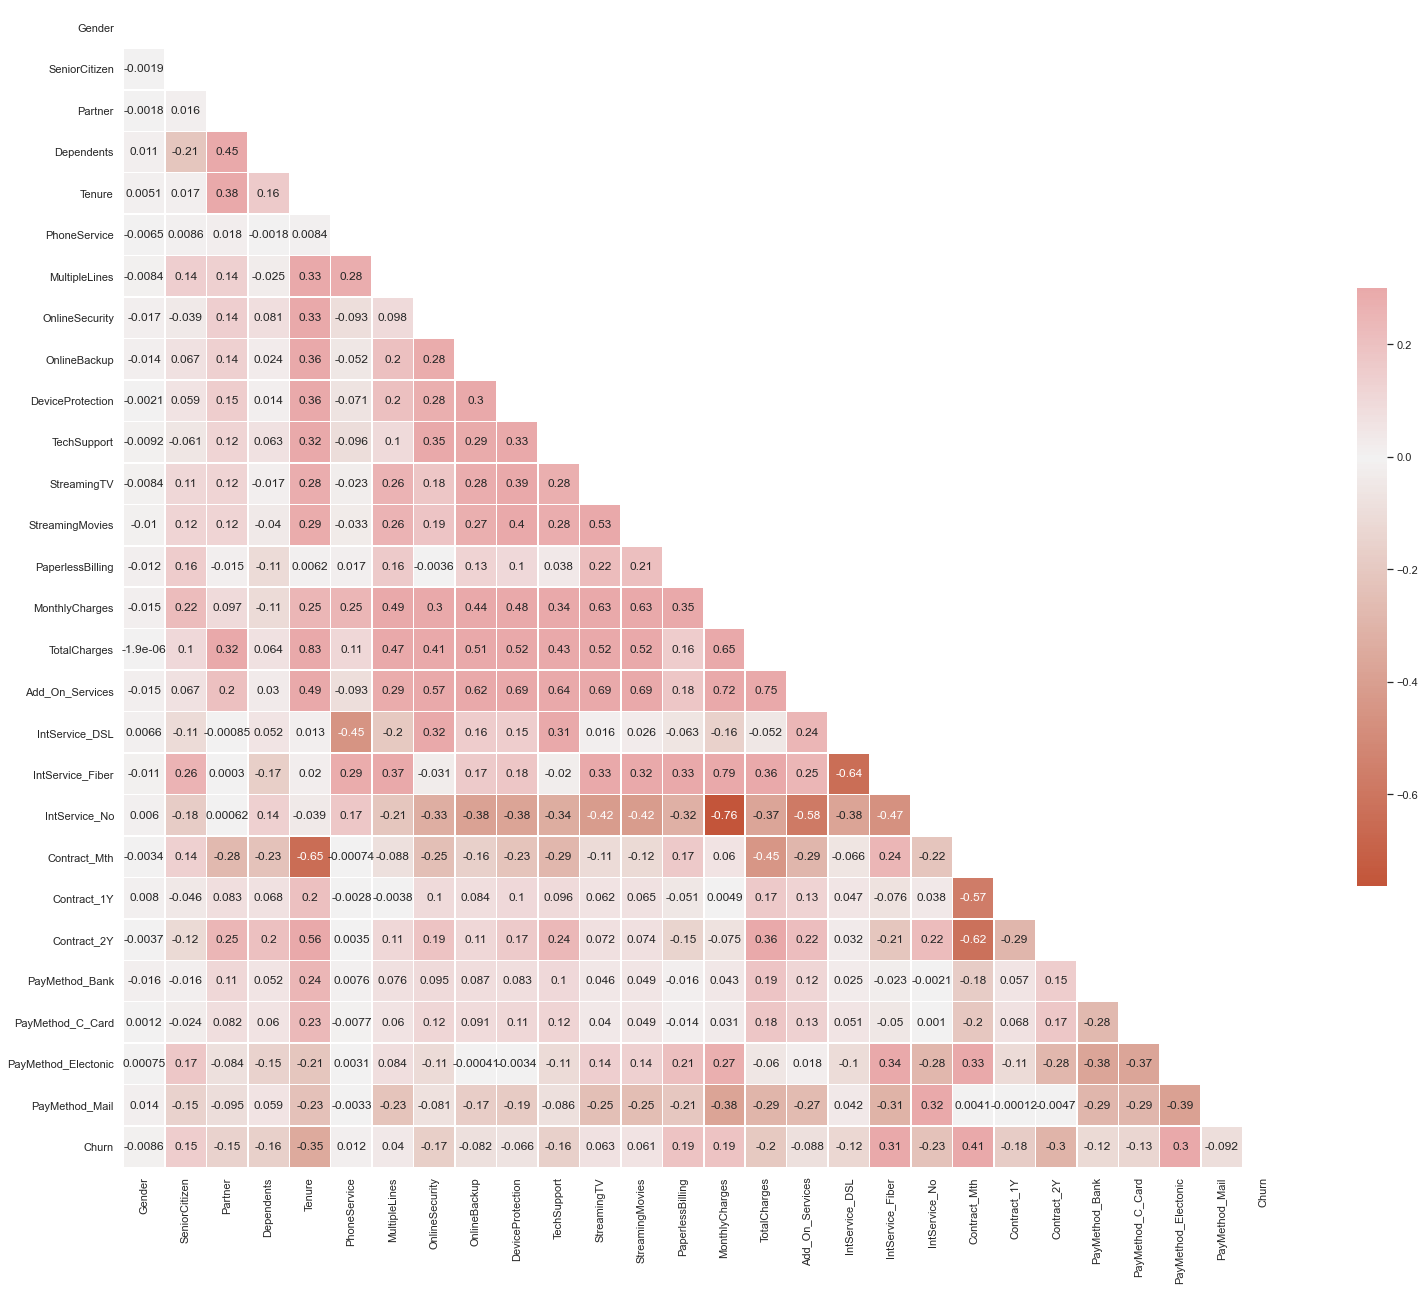

In [97]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df_n_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(26, 22))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 12, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_n_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

<AxesSubplot:>

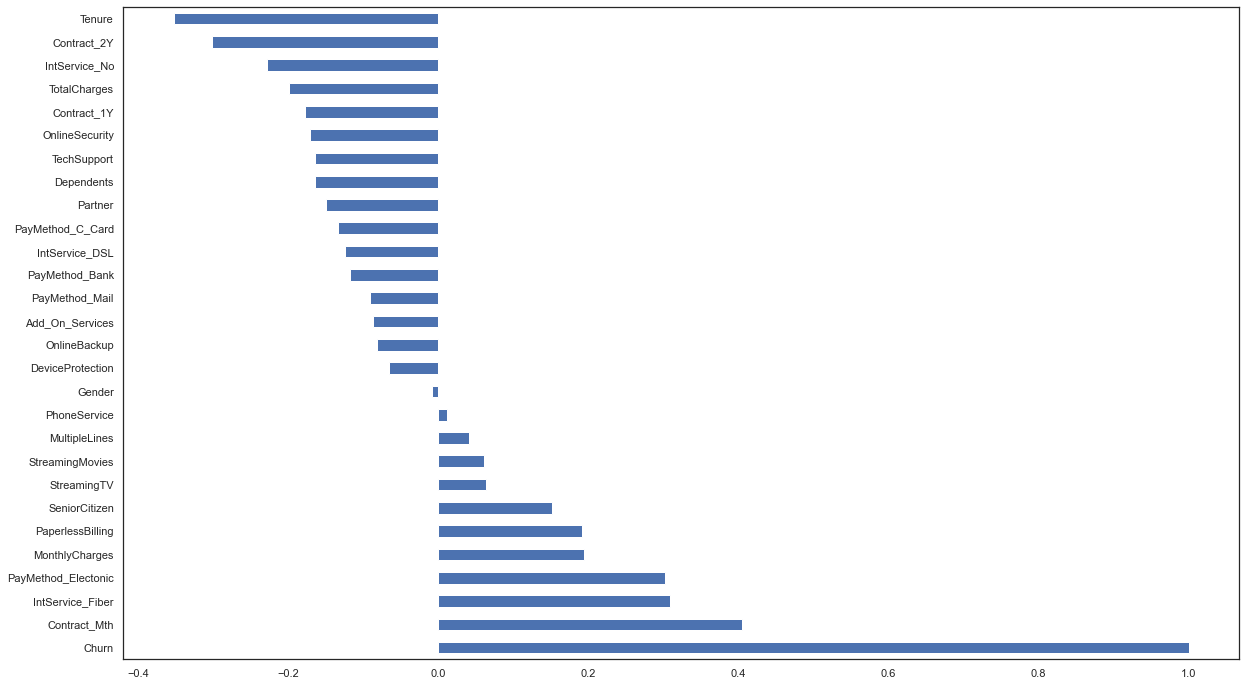

In [98]:
# Show correlation plot for correlation of Churn with each of the remaining features.

plt.figure(figsize=(16,10))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='barh', figsize=(20,12))

In [103]:
# create X and y to match Scikit-Learn parlance

# X include all the features
X = df_n.drop(columns=['Churn'])

# y is the target variable
y = df_n['Churn']

In [104]:
X.head(5)

Gender  SeniorCitizen  Partner  Dependents    Tenure  PhoneService  \
0     0.0            0.0      1.0         0.0  0.013889           0.0   
1     1.0            0.0      0.0         0.0  0.472222           1.0   
2     1.0            0.0      0.0         0.0  0.027778           1.0   
3     1.0            0.0      0.0         0.0  0.625000           0.0   
4     0.0            0.0      0.0         0.0  0.027778           1.0   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0            0.0             0.0           1.0               0.0  ...   
1            0.0             1.0           0.0               1.0  ...   
2            0.0             1.0           1.0               0.0  ...   
3            0.0             1.0           0.0               1.0  ...   
4            0.0             0.0           0.0               0.0  ...   

   IntService_DSL  IntService_Fiber  IntService_No  Contract_Mth  Contract_1Y  \
0             1.0               0.0            0.0           1.0          0.0   
1             1.0               0.0            0.0           0.0          1.0   
2             1.0               0.0            0.0           1.0          0.0   
3             1.0               0.0            0.0           0.0          1.0   
4             0.0               1.0            0.0           1.0          0.0   

   Contract_2Y  PayMethod_Bank  PayMethod_C_Card  PayMethod_Electonic  \
0          0.0             0.0               0.0                  1.0   
1          0.0             0.0               0.0                  0.0   
2          0.0             0.0               0.0                  0.0   
3          0.0             1.0               0.0                  0.0   
4          0.0             0.0               0.0                  1.0   

   PayMethod_Mail  
0             0.0  
1             1.0  
2             1.0  
3             0.0  
4             0.0  

[5 rows x 27 columns]

In [130]:
X.shape

(7043, 27)

In [105]:
y[:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int8

In [106]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

## 5) Train Test Split

In [107]:
## Create training and testing subsets

test_size = 0.3

# X = df.iloc[:,:-1] #omit the last column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 55, stratify = y)

# # Apply imputer and scalar pipeline to each of X_train and X_test separately
# pipeline = Pipeline([('imputer', imputer), ('scaler', MinMaxScaler())])

# # Pipeline is fit to X_train, then applied to both X_train and X_test
# X_train = pipeline.fit_transform(X_train)
# X_test = pipeline.transform(X_test) 

In [108]:
print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

X_train shape : (4930, 27)
X_test shape : (2113, 27)
y_train shape : (4930,)
y_test shape : (2113,)


## 6) Define & Fit Models

### Logistic Regression

In [109]:
# Instanciate and train the logistic regression model based on the training set.

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [110]:
# Make predictions (classes and probabilities) with the trained model on the test set.

y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

### Support Vecctor Machine

In [111]:
# Instanciate and train the SVM model on the training set.

support_vector_m = SVC(kernel='rbf', probability=True) 
support_vector_m.fit(X_train,y_train)

SVC(probability=True)

In [112]:
# Make predictions (classes and probabilities) with the trained model on the test set.

y_pred_svm = support_vector_m.predict(X_test)
y_pred_svm_prob = support_vector_m.predict_proba(X_test)

### K Nearest Neighbors

In [113]:
# Instanciate and train the KNN classifier based on the training set.
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [114]:
# Make predictions (classes and probabilities) with the trained classifier on the test set.
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

### Random Forest

In [165]:
# Instanciate and train the random forest model based on the training set.

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [166]:
# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

### Neural Network

In [172]:
# Instanciate NN, build up layer structure and compile model

nn = Sequential()
Input_Shape = X_train.shape[1]

nn.add(layers.Dense(1024, input_shape=(Input_Shape,), activation='relu'))
nn.add(Dropout(0.2)) 
nn.add(layers.Dense(1024, activation='relu'))
nn.add(Dropout(0.2)) 
nn.add(layers.Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.summary()

# Set callback to store model with best validation accuracy during training.
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# Train model and store best performing version
fit_nn = nn.fit(X_train, y_train,
          epochs=100,
          verbose=False,
          validation_data=(X_test, y_test),
          batch_size=30, callbacks=[mc])

best_nn = load_model('best_model.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              28672     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1,079,297
Trainable params: 1,079,297
Non-trainable params: 0
_________________________________________________________________


In [187]:
# Make predictions (classes and probabilities) with the trained model on the test set.

y_pred_nn = best_nn.predict(X_test)
# y_pred_nn_prob = best_nn.predict_proba(X_test)
y_pred_nn_classes = (best_nn.predict(X_test) > 0.5).astype("int32")


# Reduce to 1d array.
y_pred_nn_prob_1 = y_pred_nn[:,0]
y_pred_nn_classes_1 = y_pred_nn_classes[:,0]

## 7) Model Evaluation Metrics

In [120]:
# Define a function that plots the feature weights for a classifier.

def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")
    
    return print("")

In [121]:
# Define a function that plots the confusion matrix for a classifier and the train and test accuracy

def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")

In [122]:
# Define a function that plots the ROC curve and the AUC score

def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()
    
    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

In [123]:
# Define a function that plots the precision-recall-curve and the F1 score and AUC score
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.show()
    
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    
    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

In [145]:
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, probabilities[:, 1])

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

### Model Evaluation

#### Logistic Regression

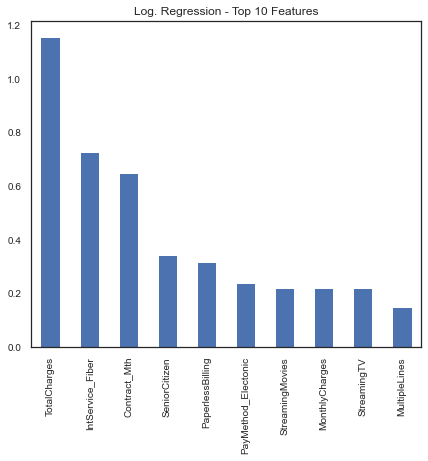

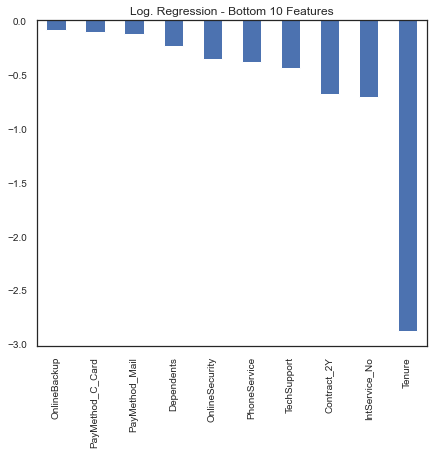

In [151]:
# Plot model evaluations.

feature_weights(X, logreg, 'Log. Regression')

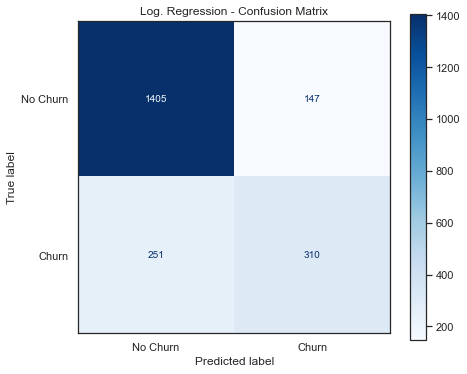

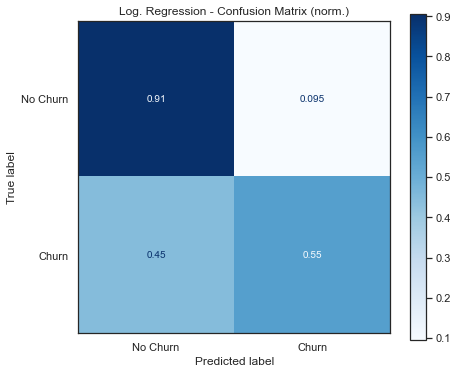

Accuracy Score Test: 0.8116422148603881
Accuracy Score Train: 0.7995943204868154 (as comparison)



In [152]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg, y_pred_logreg, 'Log. Regression')

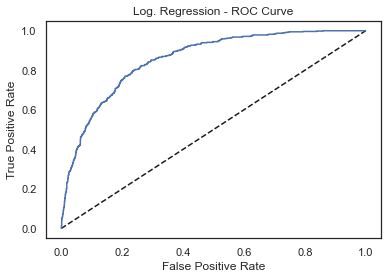

AUC Score (ROC): 0.8560290212617381



In [153]:
roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob, 'Log. Regression')


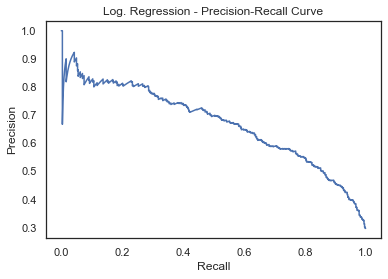

F1 Score: 0.6090373280943024 
AUC Score (PR): 0.6705383152360214



In [154]:
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 'Log. Regression')

#### SVM

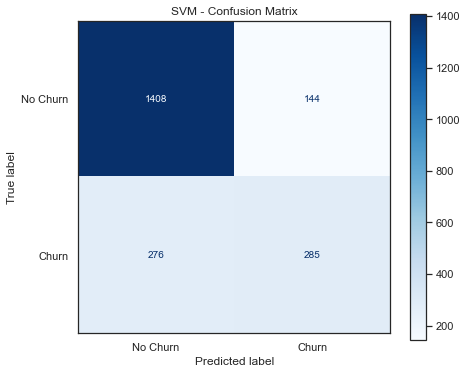

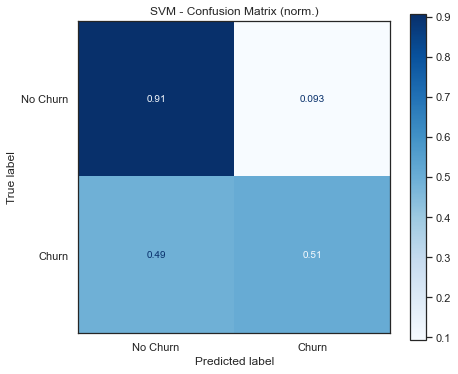

Accuracy Score Test: 0.8012304779933743
Accuracy Score Train: 0.8119675456389452 (as comparison)



In [155]:
# Plot model evaluations.

confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m, y_pred_svm, 'SVM')


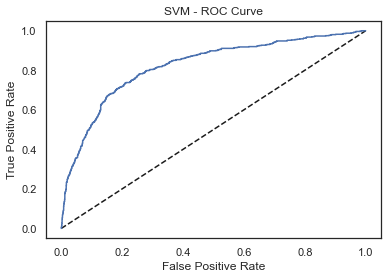

AUC Score (ROC): 0.8216251355275005



In [156]:
roc_curve_auc_score(X_test, y_test, y_pred_svm_prob, 'SVM')


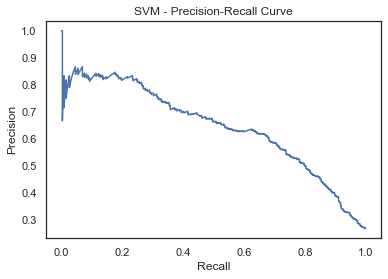

F1 Score: 0.5757575757575758 
AUC Score (PR): 0.6448346914579864



In [157]:
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm, y_pred_svm_prob, 'SVM')

#### K Nearest Neighbors

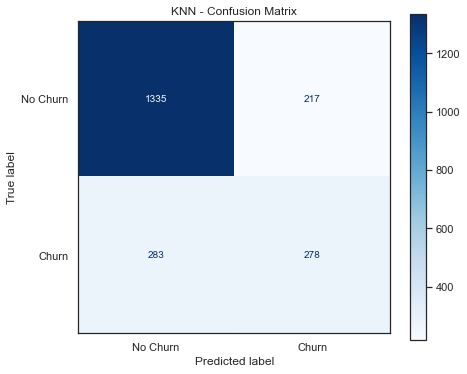

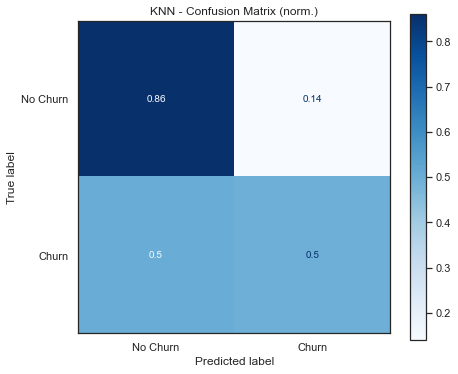

Accuracy Score Test: 0.763369616658779
Accuracy Score Train: 0.8253549695740365 (as comparison)



In [159]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn, y_pred_knn, 'KNN')

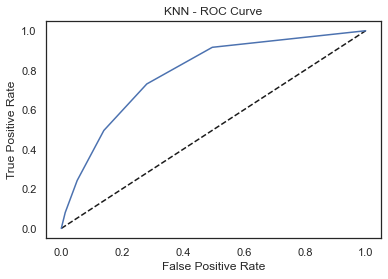

AUC Score (ROC): 0.7857051794475991



In [160]:
roc_curve_auc_score(X_test, y_test, y_pred_knn_prob, 'KNN')


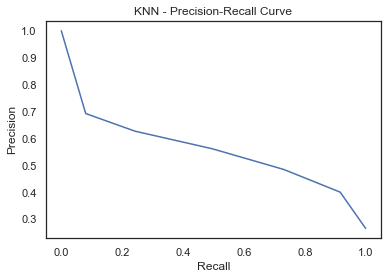

F1 Score: 0.5265151515151515 
AUC Score (PR): 0.5582561085547655



In [161]:
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn, y_pred_knn_prob, 'KNN')

#### Random Forest

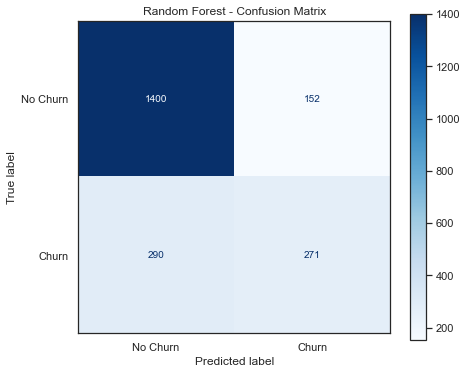

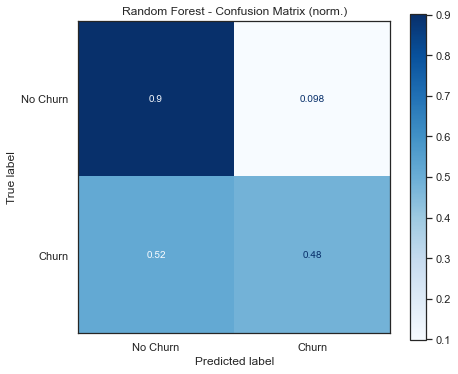

Accuracy Score Test: 0.7908187411263606
Accuracy Score Train: 0.9975659229208925 (as comparison)



In [167]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf, y_pred_rf, 'Random Forest')


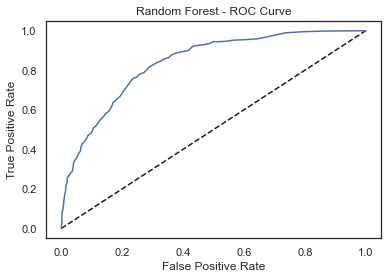

AUC Score (ROC): 0.8375036753220502



In [168]:
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob, 'Random Forest')


precision_recall_curve_and_scores(X_test, y_test, y_pred_rf, y_pred_rf_prob, 'Random Forest')

#### Neural Network

In [188]:
# Print NN evaluation metrics.

nn_conf_matrix = confusion_matrix(y_test, y_pred_nn_classes_1)
print(f'Confusion Matrix:\n{nn_conf_matrix}')
print("-----------------------------------------")

nn_accuracy = accuracy_score(y_test, y_pred_nn_classes_1)
print('Accuracy: %f' % nn_accuracy)

nn_auc = roc_auc_score(y_test, y_pred_nn_prob_1)
print('ROC AUC: %f' % nn_auc)
print("-----------------------------------------")

nn_precision = precision_score(y_test, y_pred_nn_classes_1)
print('Precision: %f' % nn_precision)

nn_recall = recall_score(y_test, y_pred_nn_classes_1)
print('Recall: %f' % nn_recall)

nn_f1 = f1_score(y_test, y_pred_nn_classes_1)
print('F1 score: %f' % nn_f1)

Confusion Matrix:
[[1405  147]
 [ 241  320]]
-----------------------------------------
Accuracy: 0.816375
ROC AUC: 0.857868
-----------------------------------------
Precision: 0.685225
Recall: 0.570410
F1 score: 0.622568


## Model Optimization

In [193]:
#Define parameter grid for GridSearch and instanciate and train model.
param_grid_L1 = {'penalty': ['l1', 'l2'], 'C': np.arange(.1, 5, .1)}
logreg_tuned = LogisticRegression(solver='saga', max_iter=1000)   
logreg_tuned_gs = GridSearchCV(logreg_tuned, param_grid_L1, cv=5)
logreg_tuned_gs.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_logreg_tuned = logreg_tuned_gs.predict(X_test)
y_pred_logreg_tuned_prob = logreg_tuned_gs.predict_proba(X_test)

print('Logistic Regression - Best Parameters: ', logreg_tuned_gs.best_params_)

Logistic Regression - Best Parameters:  {'C': 0.1, 'penalty': 'l1'}


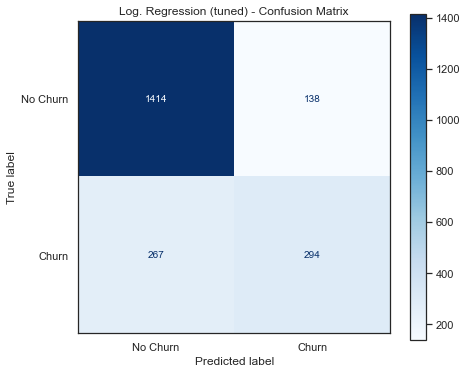

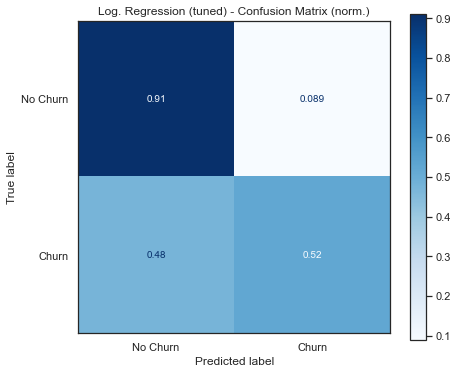

Accuracy Score Test: 0.808329389493611
Accuracy Score Train: 0.7989858012170385 (as comparison)



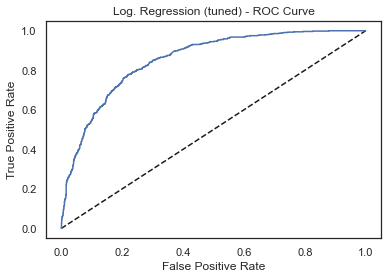

AUC Score (ROC): 0.8545043368800191



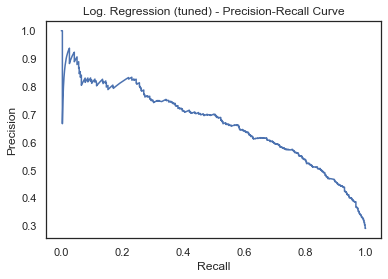

F1 Score: 0.5921450151057401 
AUC Score (PR): 0.6668879233432892



In [194]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg_tuned_gs, y_pred_logreg_tuned, 'Log. Regression (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_tuned_prob, 'Log. Regression (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg_tuned, y_pred_logreg_tuned_prob, 'Log. Regression (tuned)')

In [196]:
#Define parameter grid for GridSearch and instanciate and train model.
param_grid_svm = {'C': np.arange(.1, 3, .1)}
support_vector_m = SVC(kernel='linear', probability=True) 
support_vector_m_tuned = GridSearchCV(support_vector_m, param_grid_svm, cv=5)
support_vector_m_tuned.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_svm_tuned = support_vector_m_tuned.predict(X_test)
y_pred_svm_tuned_prob = support_vector_m_tuned.predict_proba(X_test)

print('SVM best C value', support_vector_m_tuned.best_params_, '\n')

SVM best C value {'C': 0.1} 



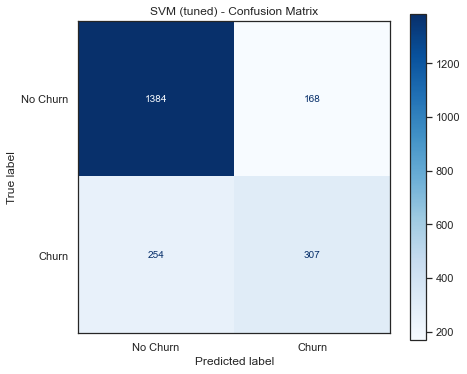

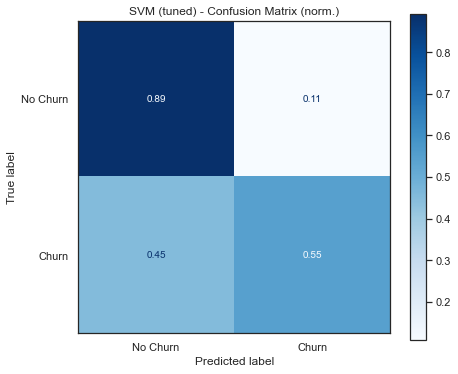

Accuracy Score Test: 0.8002839564600095
Accuracy Score Train: 0.7959432048681542 (as comparison)



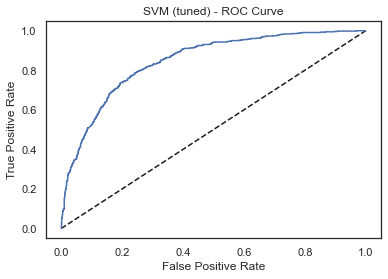

AUC Score (ROC): 0.8457404165977543



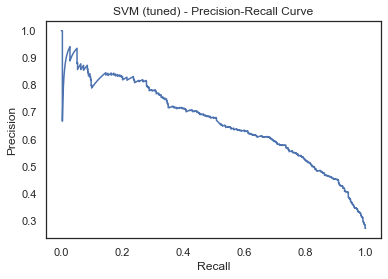

F1 Score: 0.5926640926640926 
AUC Score (PR): 0.663912589292398



In [198]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m_tuned, y_pred_svm_tuned, 'SVM (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_svm_tuned_prob, 'SVM (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm_tuned, y_pred_svm_tuned_prob, 'SVM (tuned)')

In [199]:
from sklearn.model_selection import GridSearchCV

#Define parameter grid for GridSearch and instanciate and train model.
param_grid = {'n_neighbors': np.arange(1, 30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_knn_tuned = knn_cv.predict(X_test)
y_pred_knn_tuned_prob = knn_cv.predict_proba(X_test)

print('KNN best number of neighbors:', knn_cv.best_params_, '\n')

KNN best number of neighbors: {'n_neighbors': 23} 



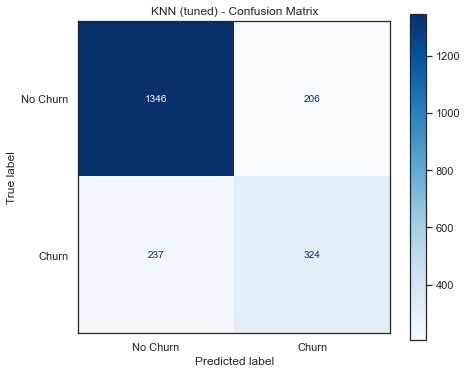

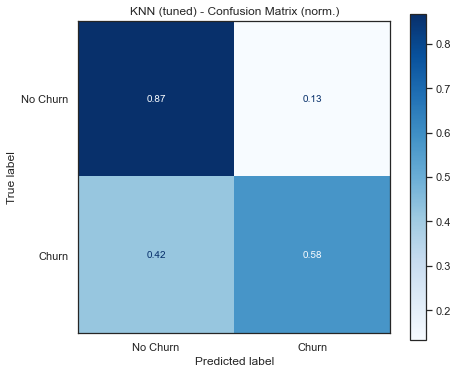

Accuracy Score Test: 0.7903454803596782
Accuracy Score Train: 0.7949290060851927 (as comparison)



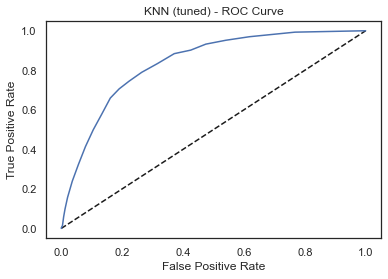

AUC Score (ROC): 0.8362132927210246



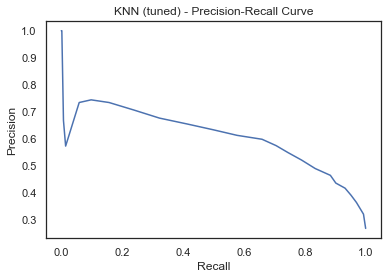

F1 Score: 0.5939505041246562 
AUC Score (PR): 0.607014596516411



In [200]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn_cv, y_pred_knn_tuned, 'KNN (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_knn_tuned_prob, 'KNN (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn_tuned, y_pred_knn_tuned_prob, 'KNN (tuned)')

In [201]:
from sklearn.model_selection import RandomizedSearchCV

#Define parameter grid for RandomizedSearch and instanciate and train model.
param_grid_rf = {'n_estimators': np.arange(10, 2000, 10), 
                 'max_features': ['auto', 'sqrt'],
                 'max_depth': np.arange(10, 200, 10),
                 'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False]}

rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, cv=5, verbose=0)
rf_random_grid.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf_tuned = rf_random_grid.predict(X_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(X_test)

print('Random Forest - Best Parameters: ', rf_random_grid.best_params_)

Random Forest - Best Parameters:  {'n_estimators': 30, 'max_features': 'auto', 'max_depth': 160, 'criterion': 'gini', 'bootstrap': True}


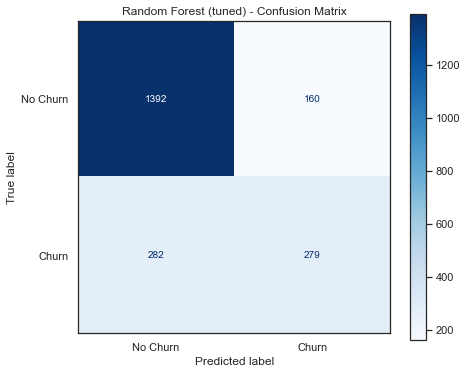

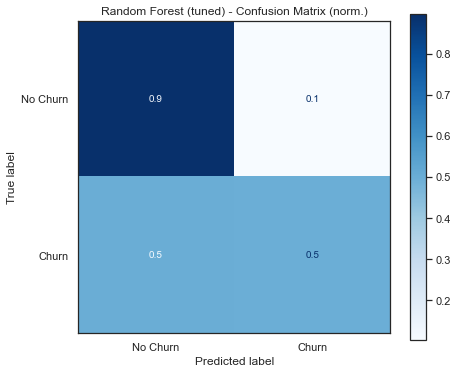

Accuracy Score Test: 0.7908187411263606
Accuracy Score Train: 0.9957403651115618 (as comparison)



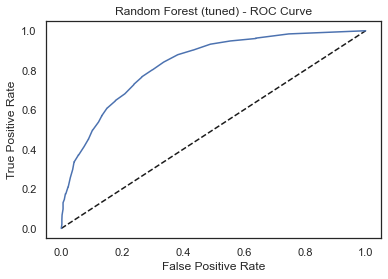

AUC Score (ROC): 0.8298389060403917



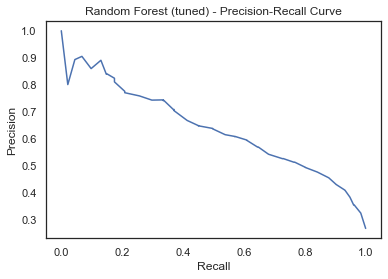

F1 Score: 0.5579999999999999 
AUC Score (PR): 0.6385782347259878



In [202]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf_random_grid, y_pred_rf_tuned, 'Random Forest (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_rf_tuned_prob, 'Random Forest (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf_tuned, y_pred_rf_tuned_prob, 'Random Forest (tuned)')

## 9) Model Deployment

In [204]:
#Saving best model 
import joblib
#Sava the model to disk
filename = 'model.sav'
joblib.dump(logreg_tuned, filename)

['model.sav']

In [205]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def preprocess(df, option):
    """
    This function is to cover all the preprocessing steps on the churn dataframe. It involves selecting important features, encoding categorical data, handling missing values,feature scaling and splitting the data
    """
    #Defining the map function
    def binary_map(feature):
        return feature.map({'Yes':1, 'No':0})

    # Encode binary categorical features
    binary_list = ['SeniorCitizen','Dependents', 'PhoneService', 'PaperlessBilling']
    df[binary_list] = df[binary_list].apply(binary_map)

    
    #Drop values based on operational options
    if (option == "Online"):
        columns = ['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', 'InternetService_Fiber_optic', 'InternetService_No', 'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes', 'OnlineBackup_No_internet_service', 'TechSupport_No_internet_service', 'TechSupport_Yes', 'StreamingTV_No_internet_service', 'StreamingTV_Yes', 'StreamingMovies_No_internet_service', 'StreamingMovies_Yes', 'Contract_One_year', 'Contract_Two_year', 'PaymentMethod_Electronic_check']
        #Encoding the other categorical categoric features with more than two categories
        df = pd.get_dummies(df).reindex(columns=columns, fill_value=0)
    elif (option == "Batch"):
        pass
        df = df[['SeniorCitizen','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity',
                'OnlineBackup','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',
                'MonthlyCharges','TotalCharges']]
        columns = ['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', 'InternetService_Fiber_optic', 'InternetService_No', 'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes', 'OnlineBackup_No_internet_service', 'TechSupport_No_internet_service', 'TechSupport_Yes', 'StreamingTV_No_internet_service', 'StreamingTV_Yes', 'StreamingMovies_No_internet_service', 'StreamingMovies_Yes', 'Contract_One_year', 'Contract_Two_year', 'PaymentMethod_Electronic_check']
        #Encoding the other categorical categoric features with more than two categories
        df = pd.get_dummies(df).reindex(columns=columns, fill_value=0)
    else:
        print("Incorrect operational options")


    #feature scaling
    sc = MinMaxScaler()
    df['tenure'] = sc.fit_transform(df[['tenure']])
    df['MonthlyCharges'] = sc.fit_transform(df[['MonthlyCharges']])
    df['TotalCharges'] = sc.fit_transform(df[['TotalCharges']])
    return df
        





In [206]:
# import plotly.express as px

# fig = px.scatter(x=df['Tenure'], y=df['TotalCharges'], 
#                  color = df['Churn'], template = 'presentation', 
#                  opacity = 0.5, facet_col = df['Contract'], 
#                  title = 'Customer Churn by Tenure, Charges, and Contract Type',
#                  labels = {'x' : 'Customer Tenure', 'y' : 'Total Charges $'})
                
# fig.show()

In [207]:
# Dont run below code,take time.

In [208]:
# np.random.seed(0)

# # create the sub models
# clf1 = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)
# clf1.fit(X_train, y_train)
# clf2 = RandomForestClassifier(n_estimators = 10, random_state = 1, n_jobs = -1)
# clf2.fit(X_train, y_train)
# clf3 = GaussianNB()
# clf3.fit(X_train, y_train)
# lr = LogisticRegression(multi_class = 'auto', solver = 'lbfgs', n_jobs = -1)
# lr.fit(X_train, y_train)
# sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
#                           meta_classifier=lr)

# params = {'kneighborsclassifier__n_neighbors': [1, 5],
#           'kneighborsclassifier__weights':['uniform', 'distance'], 
#           'randomforestclassifier__n_estimators': [10, 50, 100],
#           'randomforestclassifier__criterion': ['gini', 'entropy'],
#           'randomforestclassifier__max_depth': [2, 5, 10],
#           'meta_classifier__solver': ['liblinear', 'lbfgs'],
#           'meta_classifier__C': [0.1, 1, 10.0]}

# grid = GridSearchCV(estimator=sclf, 
#                     param_grid=params, 
#                     cv=5,
#                     refit=True,
#                     n_jobs=-1)
# grid.fit(X, y)

# cv_keys = ('mean_test_score', 'std_test_score', 'params')

# for r, _ in enumerate(grid.cv_results_['mean_test_score']):
#     print("%0.3f +/- %0.2f %r"
#           % (grid.cv_results_[cv_keys[0]][r],
#              grid.cv_results_[cv_keys[1]][r] / 2.0,
#              grid.cv_results_[cv_keys[2]][r]))

# print('Best parameters: %s' % grid.best_params_)
# print('Accuracy: %.3f' % grid.best_score_)


In [209]:
# from pycaret.classification import *
# s = setup(df, target = 'Churn', ignore_features = ['customerID'])